# Data Diri

- Nama : Radya Adi Anggara
- Domisili : Kulon Progo, Yogyakarta
- email : adiradya140@gmail.com

In [ ]:
#import library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

%matplotlib inline


---

##Data Loading
> Membaca data yang akan digunakan untuk membuat model

In [ ]:
#loading data
house = pd.read_csv('https://raw.githubusercontent.com/radyaadi/Predictive-Analytics/master/Dataset/house.csv')
house

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287



---

##Exploratory Data Analysis - Deskripsi Variabel dan Informasi Dataset
>Melihat struktur data pada dataframe


In [ ]:
#info dataframe
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

>Melihat statistik data pada dataframe

In [ ]:
house.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


>Pengecekan terhadap dataset, apakah ada yang kosong atau tidak

In [ ]:
house.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

>Pengecekan terhadap dataset, apakah ada data duplikat atau tidak

In [ ]:
print("Jumlah data duplikat : ",house.duplicated().sum())
house=house.drop_duplicates(keep="first")

Jumlah data duplikat :  0


>Melihat korelasi antar data dengan price

Disini sqft_living variabel paling berpengaruh. 

In [ ]:
house.corr()["price"].sort_values(ascending=False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64

>Menampilkan diagram antar variabel

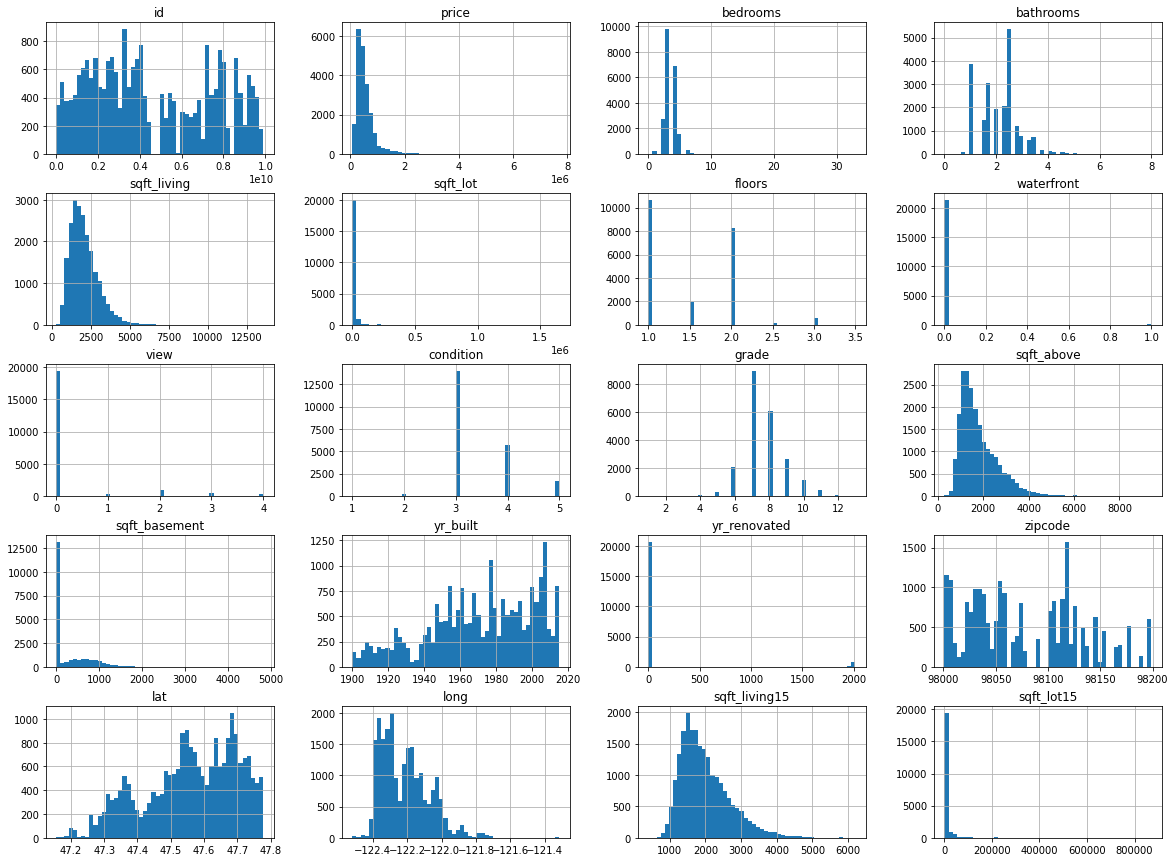

In [ ]:
house.hist(bins=50, figsize=(20,15))
plt.show()

>Menghapus kolom yang tidak relevan dan kurang berpengaruh

Berdasarkan data korelasi dan diagram, beberapa data dapat dihapus, antara lain :
- Data dengan nilai korelasi dibawah 0.1 (sqft_lot, sqft_lot15, yr_built, condition, long)
- Data tidak relevan (date, id, zipcode, yr_built, yr_renovated)
- Data dengan pesebaran dominan sebelah (sqft_basement)

In [ ]:
house = house.drop(['date','zipcode','id','long','condition','yr_built','yr_renovated','sqft_lot15','sqft_lot','sqft_basement'],axis=1)
house.head()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,lat,sqft_living15
0,221900.0,3,1.00,1180,1.0,0,0,7,1180,47.5112,1340
1,538000.0,3,2.25,2570,2.0,0,0,7,2170,47.7210,1690
2,180000.0,2,1.00,770,1.0,0,0,6,770,47.7379,2720
3,604000.0,4,3.00,1960,1.0,0,0,7,1050,47.5208,1360
4,510000.0,3,2.00,1680,1.0,0,0,8,1680,47.6168,1800


>Mengecek outliner pada price

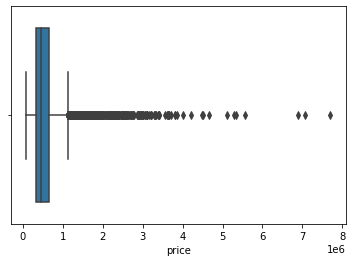

In [ ]:
sns.boxplot(x=house['price'])

>Mengilangkan outlier pada price

In [ ]:
temp = 'price'
def removeOutliers(house, x):
    q1, q3 = np.percentile(house[x], 25), np.percentile(house[x], 75)
    iqr = q3 - q1
    cut_off = iqr * 1.5
    lower, upper = 1 ,  (q3 + cut_off)
    house = house[(house[x] < upper) & (house[x] > lower)]
    print('Outliers "{}" terhapus!\n'.format(x))
    return house

house= removeOutliers(house, 'price')
house.price.value_counts()

Outliers "price" terhapus!



350000.0    172
450000.0    172
550000.0    159
500000.0    152
425000.0    150
           ... 
608500.0      1
542950.0      1
968933.0      1
641250.0      1
884744.0      1
Name: price, Length: 3543, dtype: int64

>Mendefinisikan kolom dengan tipe numerik

In [ ]:
numerical_features = ['bedrooms','bathrooms','sqft_living','floors','waterfront','view','grade','sqft_above','lat','sqft_living15']



---

##Exploratory Data Analysis - Multivariate Analysis
>Mengecek hubungan antar fitur numerik melalui visualisasi data

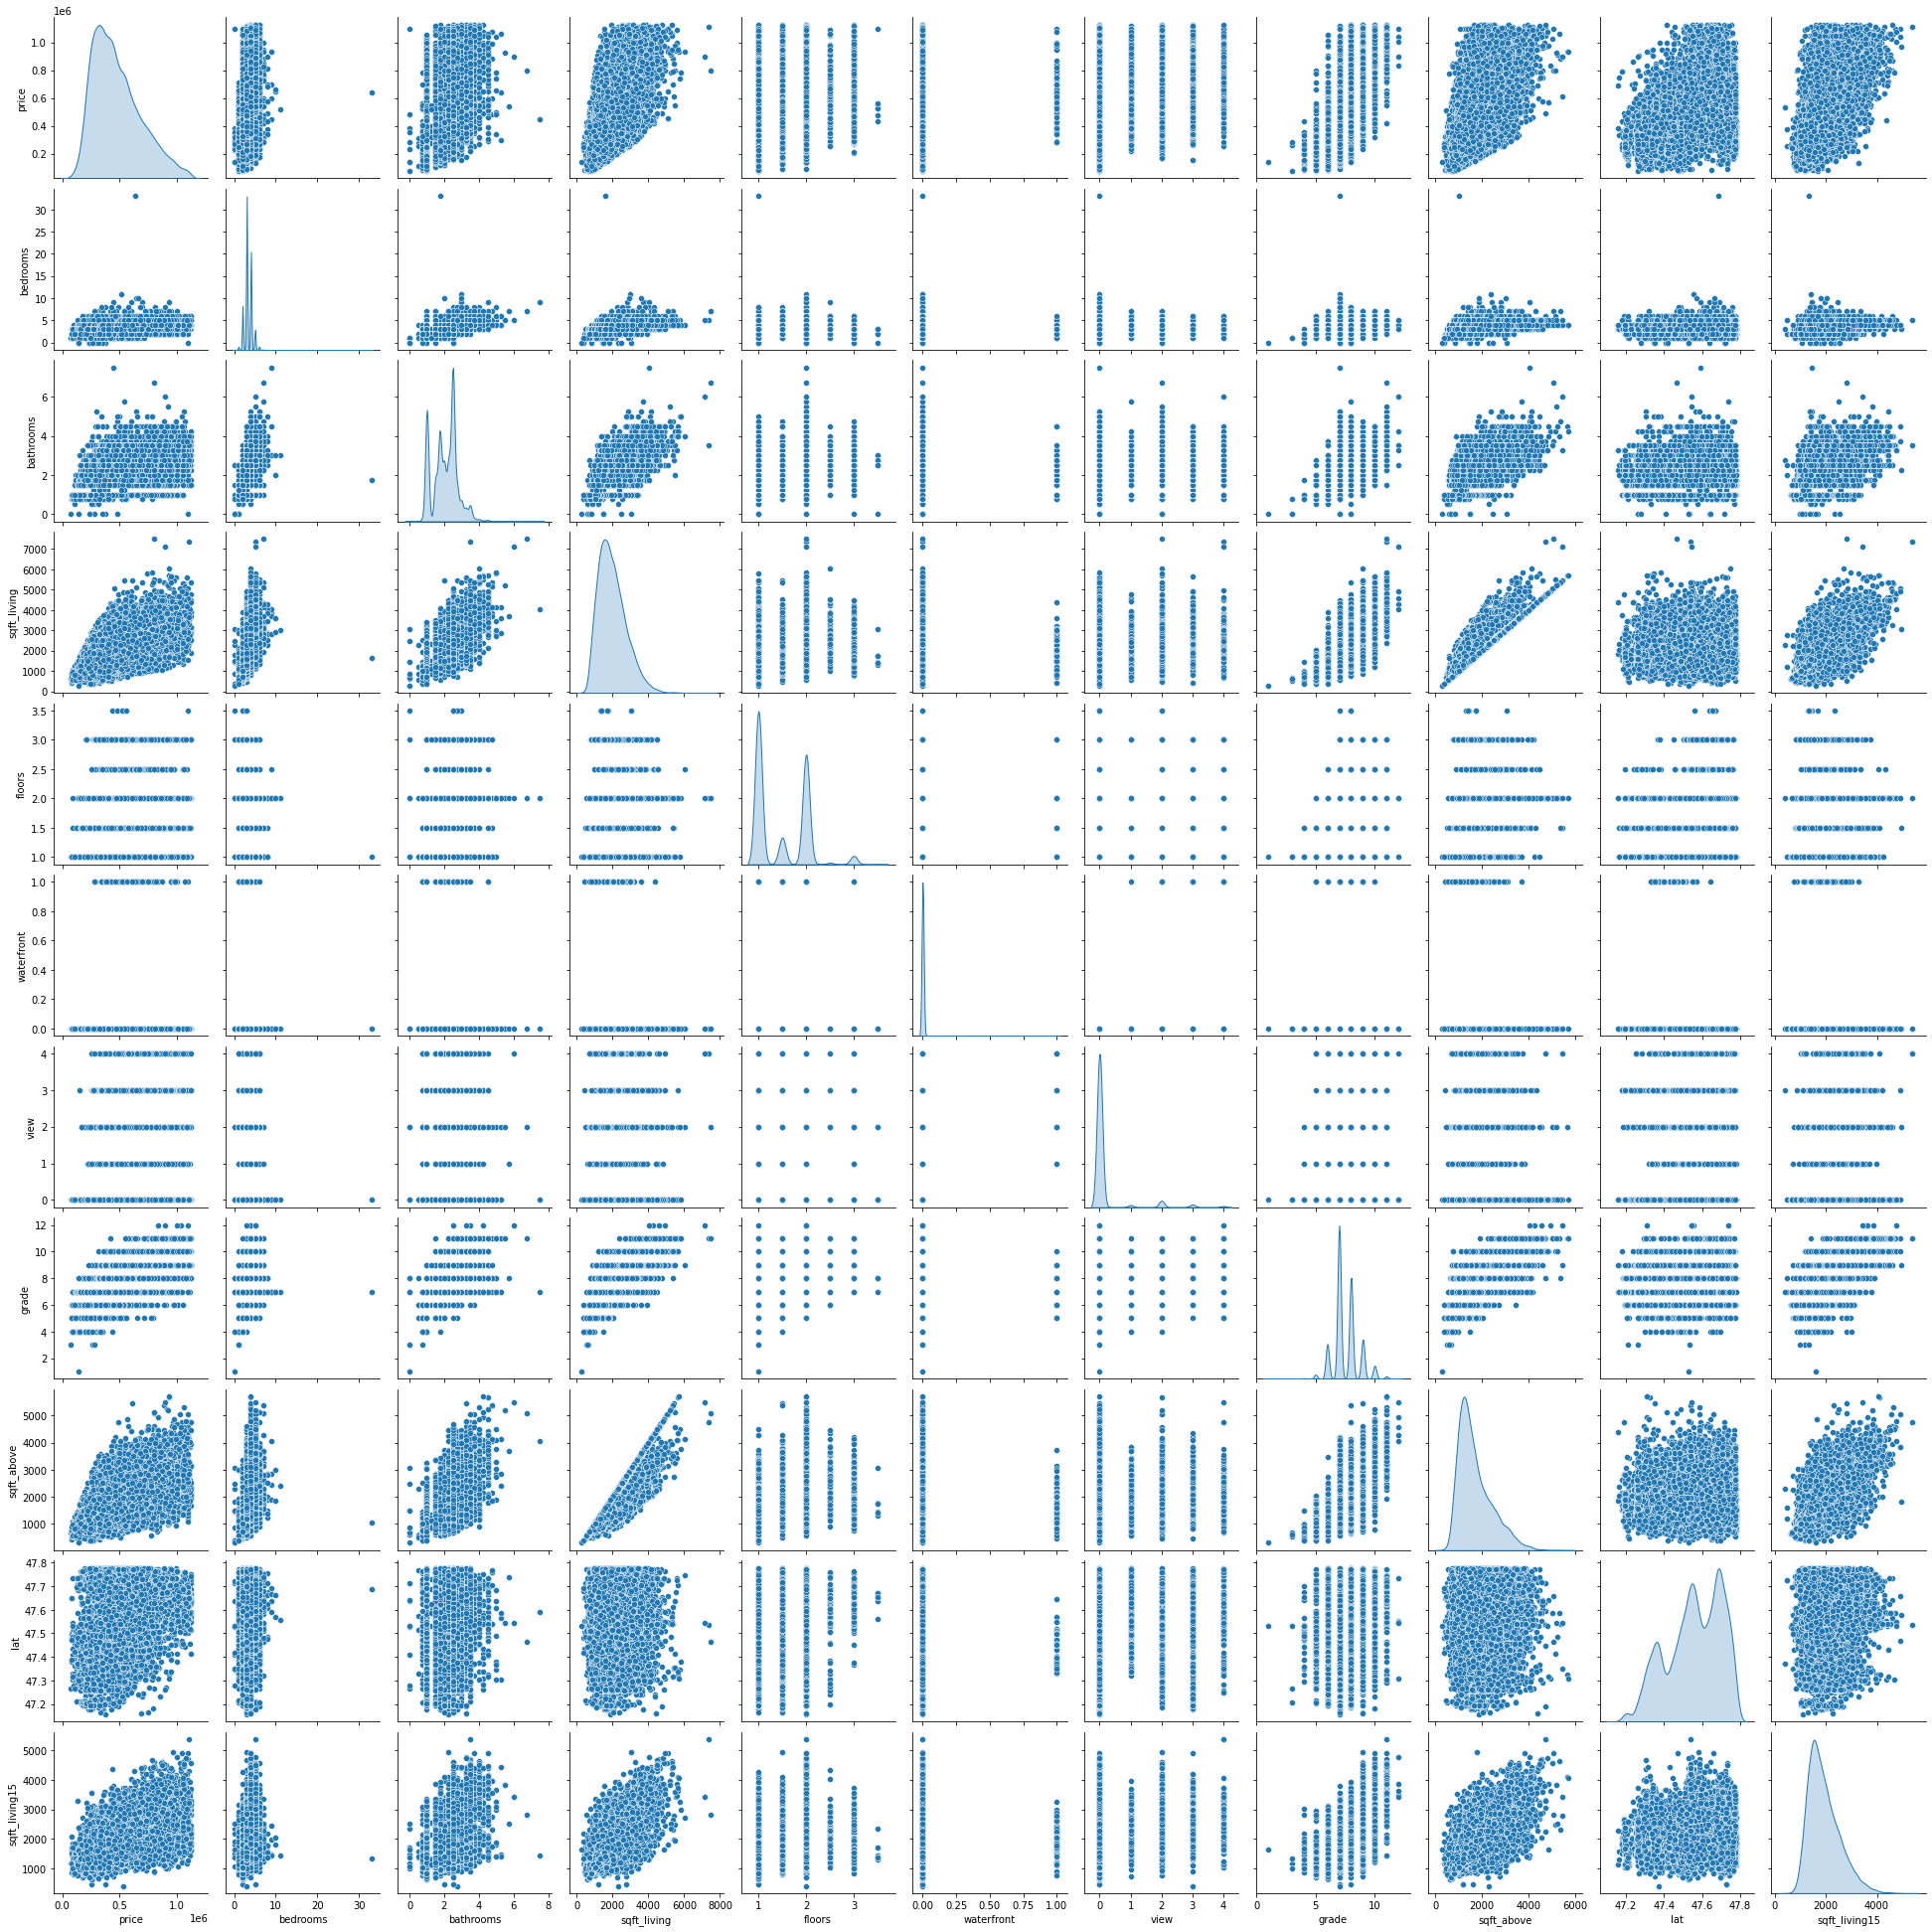

In [ ]:
# mengamati hubungan antar fitur numerik dengan fungsi pairplot()
sns.pairplot(house, diag_kind = 'kde')

>Melihat korelasi antar data dengan heatmap

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

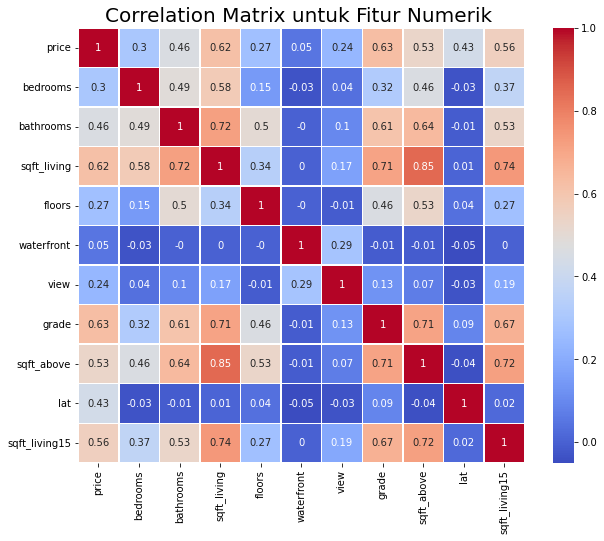

In [ ]:
plt.figure(figsize=(10, 8))
correlation_matrix = house.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)



---

##Data Preparation
>Membagi dataset menjadi train dan test untuk diuji dalam model

In [ ]:
X = house.drop(["price"],axis =1)
y = house["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 123)

>Mengecek data yang telah displit

In [ ]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 20467
Total # of sample in train dataset: 15350
Total # of sample in test dataset: 5117


>Melakukan standarisasi data latih dengan scaler

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,lat,sqft_living15
3345,-0.372263,-1.483589,-0.236831,0.043934,-0.051751,-0.268998,0.451527,0.115017,-0.089117,-1.401171
9898,-0.372263,-0.075256,-0.288681,-0.887533,-0.051751,-0.268998,-0.513650,-0.300791,0.222695,0.859054
17232,-1.509649,-0.427340,-0.470153,0.043934,-0.051751,-0.268998,-1.478828,-0.134468,-0.180743,-0.197886
15727,3.039898,0.980993,1.383459,-0.887533,-0.051751,4.441019,1.416705,0.073436,-0.770984,0.810273
6632,3.039898,0.276827,1.383459,-0.887533,-0.051751,-0.268998,0.451527,0.253620,-1.214198,-0.913353




---

##Model Deployment
>Mendefinisikan data frame untuk analisis model

In [ ]:
models = pd.DataFrame(index=['train_mse', 'test_mse'], 
                      columns=['KNN', 'RandomForest', 'Boosting'])

>Melatih model development dengan KNN

In [ ]:
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_train)

>Melatih model development dengan Random Forest

In [ ]:
RF = RandomForestRegressor(criterion='mae',n_estimators=150,max_depth=8,random_state=42)
RF.fit(X_train, y_train)
 
models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)

>Melatih model development dengan boosting algorithm

In [ ]:
boosting = AdaBoostRegressor(learning_rate= 0.001,loss='exponential',n_estimators= 50,random_state=42)                     
boosting.fit(X_train, y_train)
models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)

>Melakukan standarisasi data test dengan scaler

In [ ]:
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())




---

##Evaluasi Model
>Evaluasi ketiga model dengan metrik MSE

In [ ]:
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting'])
model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting}
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3 
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3
 
mse

,train,test
KNN,8.34553e+06,1.01376e+07
RF,8.03845e+06,9.40996e+06
Boosting,1.60496e+07,1.63371e+07


>Melihat plot metrik dengan bar chart

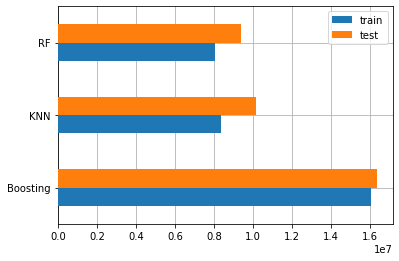

In [ ]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

>Menguji model untuk mendapat hasil yang paling optimal

In [ ]:
prediksi = X_test.iloc[:1].copy()
pred_dict = {'y_true':y_test[:1]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)
 
pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting
8979,540000.0,605850.0,572875.9,534155.7


Berdasarkan hasil prediksi, model boosting algorithm mempunyai prediksi yang paling mendekati